**Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

In [ ]:
upload = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


# **Look Dataset**

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')

# **Look Table**

In [ ]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
306,15603942,Female,51,134000,0
117,15591433,Male,36,52000,0
282,15750447,Male,37,70000,1
202,15735549,Female,39,134000,1


In [ ]:
df = df.iloc[:,2:]

In [ ]:
df.sample(5)

,Age,EstimatedSalary,Purchased
197,20,36000,0
161,25,90000,0
233,49,86000,1
156,46,59000,0
51,18,44000,0


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df.drop('Purchased' , axis = 1),
                                                                df['Purchased'] , test_size = 0.2 , random_state = 0 )

In [ ]:
X_train

,Age,EstimatedSalary
336,58,144000
64,59,83000
55,24,55000
106,26,35000
300,58,38000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


# StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#Fit the scaler to train set ( just find the mean and standardVariation)
scaler.fit(X_train)

# Now apply transform train and test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
scaler.mean_

array([3.8218750e+01, 6.9928125e+04])

In [ ]:
X_train_scaled

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

# Convert into dataFrame

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [ ]:
np.round(X_train_scaled.describe() , 1)

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.0
75%,0.8,0.5
max,2.1,2.3


# Effact of Scalling

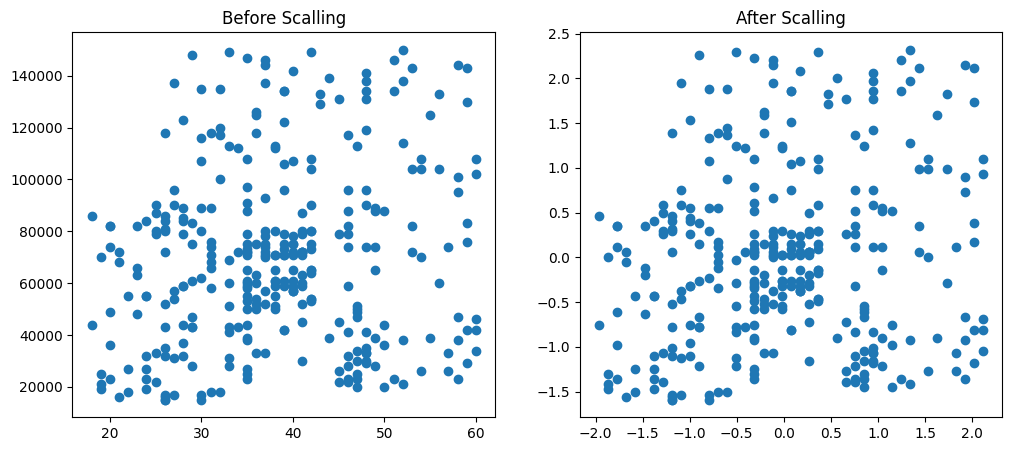

In [ ]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (12 , 5))

ax1.scatter(X_train['Age'] , X_train['EstimatedSalary'])
ax1.set_title('Before Scalling')
ax2.scatter(X_train_scaled['Age'] , X_train_scaled['EstimatedSalary'])
ax2.set_title('After Scalling')
plt.show()

(array([12.,  6., 11., 20., 17., 16., 14., 12., 35., 26., 41., 16.,  7.,
        22., 20.,  7.,  9.,  6.,  6., 17.]),
 array([-1.96547978, -1.76133721, -1.55719464, -1.35305208, -1.14890951,
        -0.94476694, -0.74062437, -0.53648181, -0.33233924, -0.12819667,
         0.0759459 ,  0.28008846,  0.48423103,  0.6883736 ,  0.89251617,
         1.09665873,  1.3008013 ,  1.50494387,  1.70908644,  1.913229  ,
         2.11737157]),
 <BarContainer object of 20 artists>)

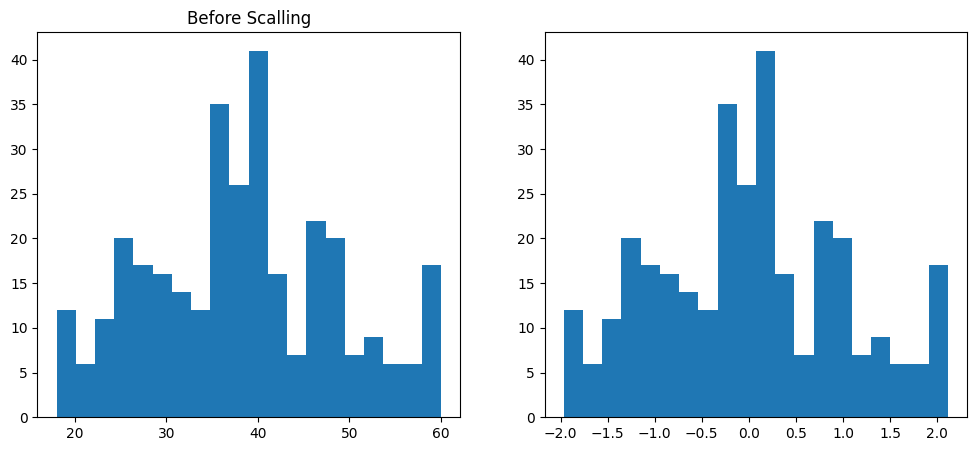

In [ ]:
fig, (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (12 , 5))


# Why scalling is importand

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [ ]:
lr.fit(X_train , y_train)
lr_scaled.fit(X_train_scaled , y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test , y_pred))
print(accuracy_score(y_test , y_pred_scaled))

0.9125
0.925


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train , y_train)
dt_scaled.fit(X_train_scaled , y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [ ]:
print(accuracy_score(y_test , y_pred))
print(accuracy_score(y_test , y_pred_scaled))

0.9
0.9


# Effect of Outlier

In [ ]:
df = df.append(pd.DataFrame({'Age':[100,5,95] , 'EstimatedSalary':[100000 , 10000000,400000]}))

AttributeError: 'DecisionTreeClassifier' object has no attribute 'append'